# Feature engineering

In this notebook we cover examples of common feature engineering tasks on both numeric and categorical data. The goal isn't to be exhaustive, but provide you with enough examples that you get the picture. As we will see in future lectures, good feature engineering can significantly improve model performance, but feature engineering, just like machine learning in general, can be "part art, part science". So let's see what we mean by that.

We begin with numeric features. Let's begin by reading some data.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
LocalFile = '../data/auto-mpg.csv'
UCI_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
url = UCI_url
auto = pd.read_csv(url, sep = '\s+', header = None, 
                   names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 
                            'acceleration', 'model year', 'origin', 'car_name'])

auto['cylinders'] = auto['cylinders'].astype('category')
auto.describe()

,mpg,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,455.000000,5140.000000,24.800000,82.000000,3.000000


We saw some examples of **feature transformation** functions in the previous lesson. **Feature engineering**, in fact, consists of running similar feature transformations on the data and gradually modifying existing columns and adding new features to the data, with the goal of ending up with features that are more useful to the model than the original features we started with. What makes feature engineering so special is that we apply these transformations with an eye towards making the machine learning easier or more doable. Having good features (what feature engineering is all about) can significantly impact how well we do when we move on to machine learning.

A common type of feature transformation for numeric features is **feature normalization**. Note that **normalization** is a word that means something very different in relational databases than in machine learning, so be careful not to confuse the two. 

The general formula for **linear normalization** is:
$$xNorm = \dfrac{x - offset}{scale}$$
- **offset** is the upward shift of the original variable before normalization
- **scale** is the spread or stretch of the original variable before normalization

The two most common ways to normalize features is **Z-normalization** and **min-max normalization**:

- **Z-normalization** consists of the following transformation, and results in most of the values for the transformed $x$ being between -2 and 2. 
$$x \rightarrow \dfrac{x - mean(x)}{std(x)}$$
- **min-max normalization** consists of the following transformation, and forces all the values of the transformed $x$ to be between 0 and 1: 
$$x \rightarrow \dfrac{x - min(x)}{max(x) - min(x)}$$  

So what is the purpose of normalization? If we only have one feature, normalization might not serve a purpose. Normalization makes sense when we have many features and we want to **put them on the same scale**, which is why normalization is also sometimes called **rescaling** or **standardization**. **Some (but not all) ML algorithms only work properly if the data is normalized, otherwise the features that have larger numbers or large scales will dominate the model.** So normalization acts as a way of leveling the playing field among variables.

### Exercise (15 minutes)

- Normalize `mpg`, `displacement`, `weight` and `acceleration`. Instead of overwriting the original columns, add the normalized features as new columns and name each column using the column name and a `_norm` suffix. You are free to choose between Z-normalization or min-max normalization.

In [3]:
#Add code here
auto['mpg_norm'] = (auto['mpg'] - np.mean(auto['mpg']))/np.std(auto['mpg'])
auto['displacement_norm'] = (auto['displacement'] - np.mean(auto['displacement']))/np.std(auto['displacement'])
auto['weight_norm'] = (auto['weight'] - np.mean(auto['weight']))/np.std(auto['weight'])
auto['acceleration_norm'] = (auto['acceleration'] - np.mean(auto['acceleration']))/np.std(auto['acceleration'])

Unless your Python skills are improving by leaps and bounds, you probably normalized the features one at a time. What if we wanted to do it all at once? 

- Write a loop to iterate over the four columns and normalize each. To make it easier, we already put the column names in a list for you.

In [4]:
num_cols = ['mpg', 'displacement', 'weight', 'acceleration']
# your code goes here
for column in num_cols:
    auto[column + '_norm'] = (auto[column] - np.mean(auto[column]))/np.std(auto[column])

There is an even better way to run our transformations all at once without writing a loop. First we have to write a function whose input is an array and whose output is an array of the same size with the values normalized. 

- Write such a function and use the below cell to test it and make sure it worked.

In [5]:
def normalize(x):
    x_norm = (x - np.mean(x))/np.std(x) # Add code here:  modify here to write your function
    return x_norm

x_test = np.array([3, 5, 9, 11, 2, 0])
normalize(x_test)

array([-0.51639778,  0.        ,  1.03279556,  1.54919334, -0.77459667,
       -1.29099445])

- Apply the function to the data. HINT: use the `apply` method.
  - note that we need to limit the data to only the four columns we wish to transform
  - we need to use the `axis = 0` argument to let `apply` know that the transformation applies to columns (`axis = 1` would apply it to rows, which is not what we want here)

In [6]:
# Add code here
auto[[col + '_norm' for col in num_cols]] = auto[num_cols].apply(normalize, axis=0)
auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car_name,mpg_norm,displacement_norm,weight_norm,acceleration_norm
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu,-0.706439,1.090604,0.630870,-1.295498
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320,-1.090751,1.503514,0.854333,-1.477038
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite,-0.706439,1.196232,0.550470,-1.658577
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst,-0.962647,1.061796,0.546923,-1.295498
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino,-0.834543,1.042591,0.565841,-1.840117
...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl,0.446497,-0.513026,-0.213324,0.011586
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup,2.624265,-0.925936,-0.993671,3.279296
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage,1.087017,-0.561039,-0.798585,-1.440730
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger,0.574601,-0.705077,-0.408411,1.100822


- Check the results using `describe`. Then do an additional sanity check:
  - if your function is doing Z-normalization, then check the mean and standard deviation of your normalized columns to make sure they are 0 and 1 respectively
  - if your function is doing min-max normalization, then check the minimum and maximum values of your normalized columns to make sure they are 0 and 1 respectively

In [7]:
auto.describe().round(decimals=2)

,mpg,displacement,weight,acceleration,model year,origin,mpg_norm,displacement_norm,weight_norm,acceleration_norm
count,398.00,398.00,398.00,398.00,398.00,398.00,398.00,398.00,398.00,398.00
mean,23.51,193.43,2970.42,15.57,76.01,1.57,-0.00,-0.00,-0.00,0.00
std,7.82,104.27,846.84,2.76,3.70,0.80,1.00,1.00,1.00,1.00
min,9.00,68.00,1613.00,8.00,70.00,1.00,-1.86,-1.20,-1.60,-2.75
25%,17.50,104.25,2223.75,13.82,73.00,1.00,-0.77,-0.86,-0.88,-0.63
50%,23.00,148.50,2803.50,15.50,76.00,1.00,-0.07,-0.43,-0.20,-0.02
75%,29.00,262.00,3608.00,17.18,79.00,2.00,0.70,0.66,0.75,0.58
max,46.60,455.00,5140.00,24.80,82.00,3.00,2.96,2.51,2.57,3.35


In our implementation of the `normalize` function above, we computed the mean and standard deviation (or min and max in the case of min-max normalization) **on the fly**. This means that any time we want to normalize new data, we compute the mean and standard deviation of the new data and then normalize it accordingly. In machine learning, this poses a problem: normalizing two different data sets using the mean and standard deviation of each means that they each get normalized silghtly differently and we lose the consistency (we will see why in future lectures). So instead, we want to learn the mean and standard deviation of one data, and normalize **that data and any future data** using the same mean and standard deviation.

Modify the `normalize` function so the mean and standard deviation are determined from one variable. Then apply the transformation to the other variable.  The test shows the following results:
- normalize `x_test_1` using the normalization parameters from `x_test_1` 
- normalize `x_test_2` using the normalization parameters from `x_test_1`
- normalize `x_test_2` using the normalization parameters from `x_test_2`

In [8]:
# Add code here

def normalize(x, by=None):
    if by is not None:
        offset = np.mean(by)
        scale = np.std(by)
    else:
        offset = np.mean(x)
        scale = np.std(x)
    x_norm = (x - offset)/scale
    return x_norm

x_test_1 = np.array([3, 5, 9, 11, 2, 0])
x_test_2 = np.array([1, 2, 5, 13, 9, -4])

print('Normalization of x_test_1:', normalize(x=x_test_1, by=x_test_1))
print('Normalization of x_test_2 by prameters from x_test_1:', normalize(x=x_test_2, by=x_test_1))
print('Normalization of x_test_2 by prameters from x_test_2:', normalize(x=x_test_2, by=x_test_2))

Normalization of x_test_1: [-0.51639778  0.          1.03279556  1.54919334 -0.77459667 -1.29099445]
Normalization of x_test_2 by prameters from x_test_1: [-1.03279556 -0.77459667  0.          2.06559112  1.03279556 -2.32379001]
Normalization of x_test_2 by prameters from x_test_2: [-0.60302269 -0.42211588  0.12060454  1.56785899  0.84423176 -1.50755672]


This last part has important consequences in machine learning. As we will see next, this is something that is automatically handled by `sklearn`.

### End of exercise

Since normalization is a very common task, you shoudn't be surprised to find out that there are already functions for it. I hope you still found the previous exercise useful!

However, this time we have to go to the `sklearn` library to find our function. The `sklearn` library is Python's most common machine learning library and one that we will return to in future lectures. In addition to the machine learning algorithms we will learn about, `sklearn` also has functions for **pre-processing data**, which is a vague term that includes tasks such as missing-value imputation, feature engineering and so on. Let's see how we can use it to normalize our data.

In [11]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
num_cols_minmax = [c + '_minmax' for c in num_cols] # names of min-max-transformed columns

At first blush, the following code might look a little strange, but this pattern as we will see is very common to ML-related tasks in `sklearn`:
- initialize the process by choosing the function (with arguments we wish, if any)
- run `fit` first on the data to determine the parameters
- run `transform` to apply the parameters in the transformation

In [12]:
minmax_scaler = MinMaxScaler() # initialization / create an instance of the class
minmax_scaler.fit(auto[num_cols])
auto[num_cols_minmax] = minmax_scaler.transform(auto[num_cols])
auto[num_cols_minmax].head()

,mpg_minmax,displacement_minmax,weight_minmax,acceleration_minmax
0,0.239362,0.617571,0.536150,0.238095
1,0.159574,0.728682,0.589736,0.208333
2,0.239362,0.645995,0.516870,0.178571
3,0.186170,0.609819,0.516019,0.238095
4,0.212766,0.604651,0.520556,0.148810


In [13]:
print(minmax_scaler.data_min_)
print(minmax_scaler.data_max_)
print(1./minmax_scaler.scale_)

[   9.   68. 1613.    8.]
[  46.6  455.  5140.    24.8]
[  37.6  387.  3527.    16.8]


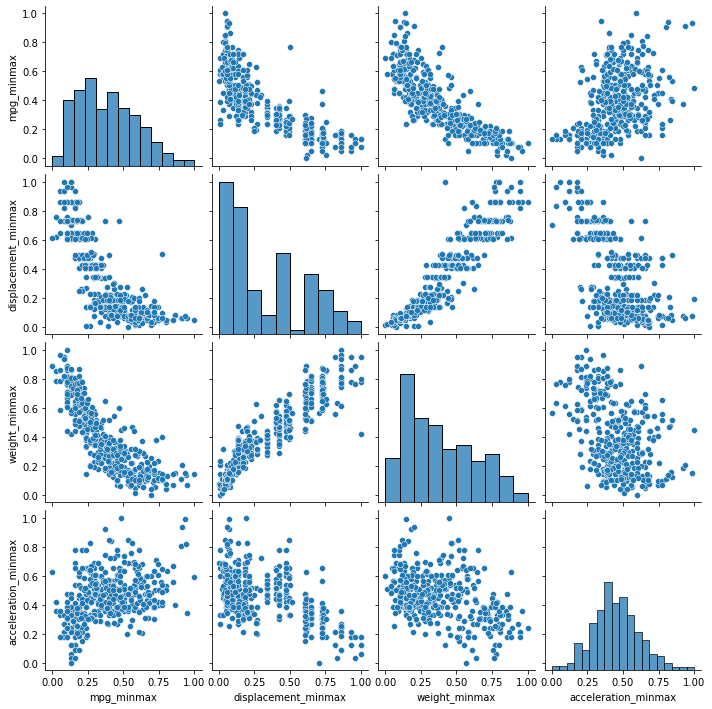

In [14]:
sns.pairplot(auto[num_cols_minmax]);

Here's the same example, but using Z-normalization.

In [15]:
num_cols_z = [c + '_z' for c in num_cols] # names of Z-transformed columns
znorm_scaler = StandardScaler()
znorm_scaler.fit(auto[num_cols])
auto[num_cols_z] = znorm_scaler.transform(auto[num_cols])
auto[num_cols_z].head()

,mpg_z,displacement_z,weight_z,acceleration_z
0,-0.706439,1.090604,0.630870,-1.295498
1,-1.090751,1.503514,0.854333,-1.477038
2,-0.706439,1.196232,0.550470,-1.658577
3,-0.962647,1.061796,0.546923,-1.295498
4,-0.834543,1.042591,0.565841,-1.840117


Let's look at the scatter plot matirx for the normalized features.

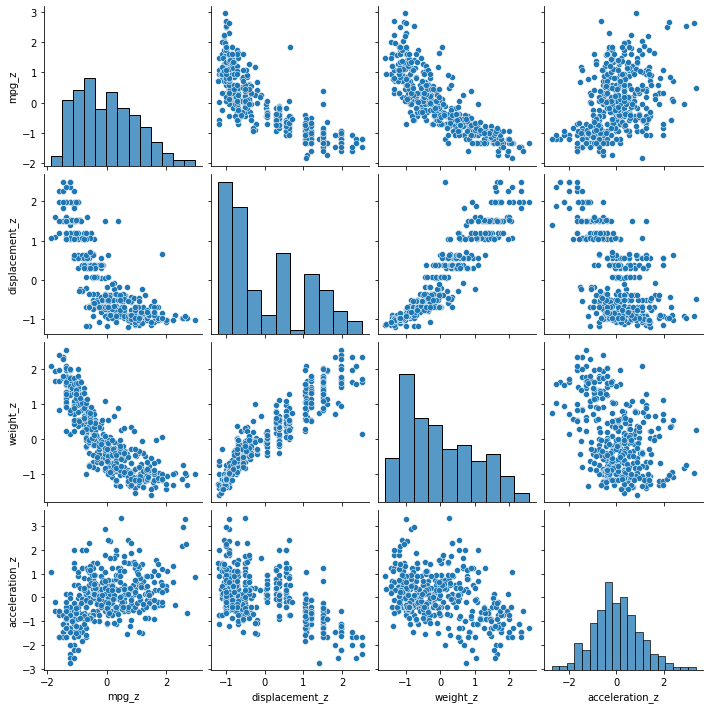

In [16]:
sns.pairplot(auto[num_cols_z]);

### Comment on Scatterplots and Histograms
In either case, it doesn't look like normalization changed anything to the scatter plot matrix. Do you notice what changed? The answer is that the **range of the data** is what changed. Just check the $x$ and $y$ axes and you'll see. Normalization is not really supposed to change the distribution of the data, just put all features on the same scale.

Let's look one last time at the code for normalizing the data using `sklearn`.
<br/><br/>
**<font size="5">
`minmax_scaler = MinMaxScaler()`<br/>
`minmax_scaler.fit(auto[num_cols])`<br/>
`auto[num_cols_minmax] = minmax_scaler.transform(auto[num_cols])`<br/>
`auto[num_cols_minmax].head()`
</font>**  
<br/>
You might be curious why we use `fit` followed by `transform`. What exactly happens when we run `fit`? Why should those two steps not be a single step? Here's a short answer using `MinMaxScaler` as our example:
  - When we run `fit` we find the min and max for the columns and rememeber it.
  - When we run `transform` we apply the transformation using the min and max we found when we ran `fit`.

This means that we can learn the min and max once, and then apply the **same** transformation (with the same min and max) not just to the original data, but any future data. In machine learning, this has important consequences, but that's the topic of a future lecture.

# Assignment

In this assignment, we want to read the `retail-churn.csv` dataset that we examined in a previous assignment and begin to pre-process it. The goal of the assignment is to become familiar with some common pre-processing and feature engineering steps by implementing them.

Find your assignment in **Lesson_06_h_assignment.ipynb**